## Real-Time Face Mask Detector with Python, OpenCV, machine learning 
  
During pandemic COVID-19, WHO has made wearing masks compulsory to protect against this deadly virus. In this tutorial we will develop a machine learning project – Real-time Face Mask Detector with Python.

In [67]:
!pip install opencv-python  ## install opencv for datab collection as wells prediction 

In [71]:
import cv2  # now import cv2 from opencv

### use of Haar Features


All human faces share some similar properties. These regularities may be matched using Haar Features.

A few properties common to human faces:

The eye region is darker than the upper-cheeks.
The nose bridge region is brighter than the eyes.
Composition of properties forming matchable facial features:

Location and size: eyes, mouth, bridge of nose
Value: oriented gradients of pixel intensities
The four features matched by this algorithm are then sought in the image of a face (shown at right).

Rectangle features:

Value = Σ (pixels in black area) - Σ (pixels in white area)
Three types: two-, three-, four-rectangles, Viola & Jones used two-rectangle features
For example: the difference in brightness between the white & black rectangles over a specific area
Each feature is related to a special location in the sub-window
Summed area table



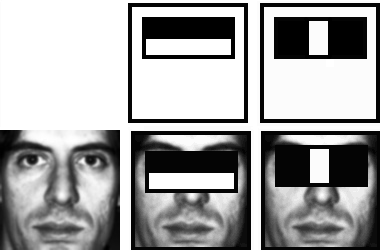





just download "haarcascade_frontalface_default.xml " file. in github


In [72]:
haar_data="haarcascade_frontalface_default.xml "

## use cascadeclassifier

Cascading classifiers are trained with several hundred "positive" sample views of a particular object and arbitrary "negative" images of the same size. ... This process is most commonly used in image processing for object detection and tracking, primarily facial detection and recognition.

In [73]:
cascade=cv2.CascadeClassifier(haar_data)

## data collection


In [74]:
capture=cv2.VideoCapture(0)
data=[]
while True:
    flag,img=capture.read()
    if flag:
        faces=cascade.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+w),(25,46,21),10)
            face=img[y:y+h, x:x+w, :]
            face=cv2.resize(face,(50,50))
            print(len(data))
            
            if len(data)<400:
                data.append(face)
        cv2.imshow("result",img)
        if cv2.waitKey(2)==27 or len(data)>= 200:
            break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [75]:
import numpy as np
np.save('without_mask.npy',data)

In [76]:
import matplotlib.pyplot as plt

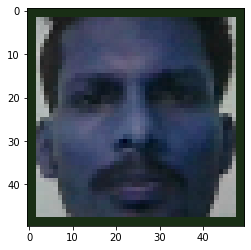

In [77]:
plt.imshow(data[0])

In [78]:
capture=cv2.VideoCapture(0) 
data=[]
while True:
    flag,img=capture.read()
    if flag:
        faces=cascade.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+w),(25,46,21),10)
            face=img[y:y+h, x:x+w, :]
            face=cv2.resize(face,(50,50))
            print(len(data))
            if len(data)<400:
                data.append(face)
        cv2.imshow("result",img)
        if cv2.waitKey(2)==27 or len(data)>= 200:
            break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [79]:
np.save('with_mask.npy',data)

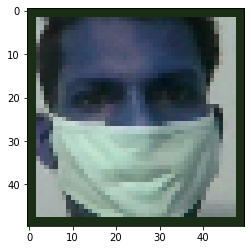

In [80]:
plt.imshow(data[0])

In [81]:
import cv2

In [82]:
without_mask=np.load('without_mask.npy')
with_mask=np.load('with_mask.npy')


In [83]:
without_mask.shape

(200, 50, 50, 3)

In [84]:
with_mask.shape

(200, 50, 50, 3)

# converting 4 dim into 2 dim

In [85]:

with_mask=with_mask.reshape(200,50*50*3)
without_mask=without_mask.reshape(200,50*50*3)

In [86]:
with_mask.shape

(200, 7500)

In [87]:
x=np.r_[with_mask,without_mask]
x.shape

(400, 7500)

# asigning labels for each data set 


In [88]:
labels=np.zeros(x.shape[0])
labels[200:]=1.0

In [89]:
names={0:'mask',1:'no mask'}

## model creation

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.25)
x_train.shape

(300, 7500)

In [92]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

## TESTING or PREDICTION

In [93]:
haar_data="haarcascade_frontalface_default.xml "
cascade=cv2.CascadeClassifier(haar_data)
font=cv2.FONT_HERSHEY_COMPLEX

capture=cv2.VideoCapture(0)
data=[]
while True:
    flag,img=capture.read()
    if flag:
        face=cascade.detectMultiScale(img)
        for x,y,w,h in face:
            if pred==1:
                cv2.rectangle(img,(x,y),((x+w),(y+h)+20),(25,78,215),4)
            else:
                cv2.rectangle(img,(x,y),((x+w),(y+h)+20),(0,255,0),4)
            face=img[y:y+h,x:x+w, :]
            face=cv2.resize(face,(50,50))
            face=face.reshape(1,-1)
         
            clf = svm.SVC(kernel='linear')
            clf.fit(x_train, y_train)
            pred=clf.predict(face)[0]
            n=names[int(pred)]
            if pred==1:
                cv2.putText(img,n,(x,y),font,2,(25,78,215),3)
            else:
                cv2.putText(img,n,((x)+2,(y)+2),font,2,(89,25,250),3)
            
        cv2.imshow('result',img)
        
        if cv2.waitKey(2)==27 :
            break
capture.release()
cv2.destroyAllWindows()



## RESULT
  


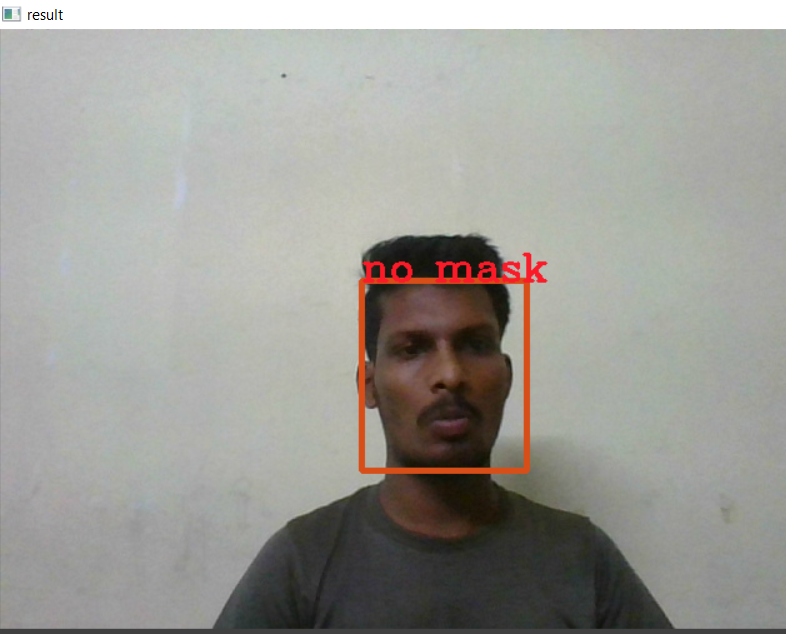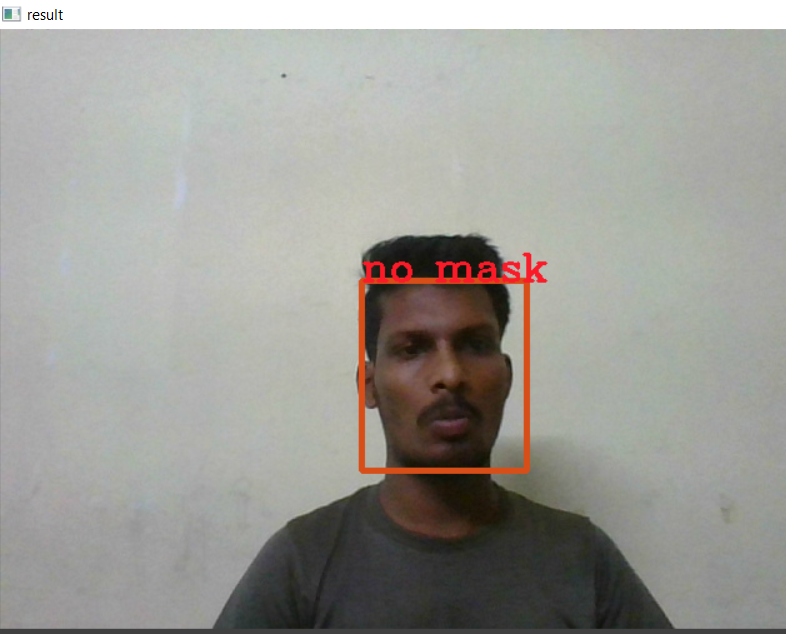






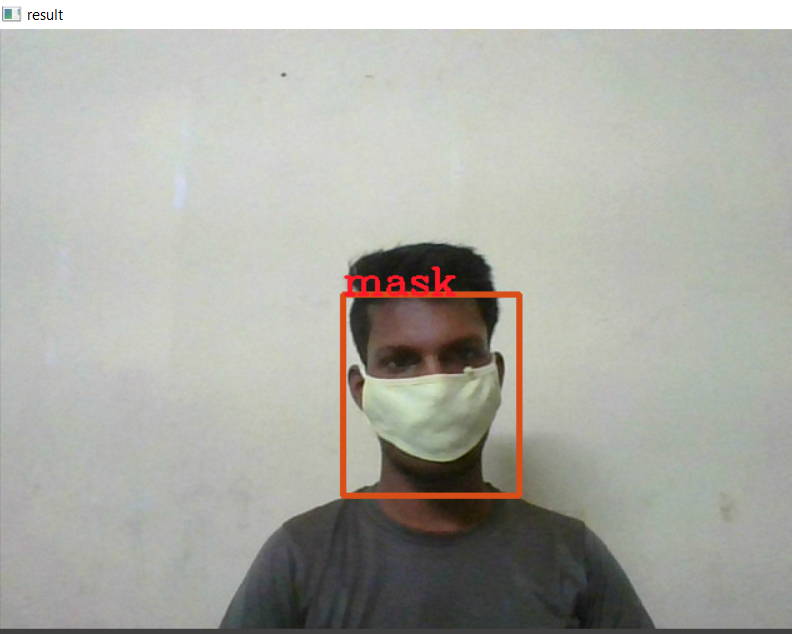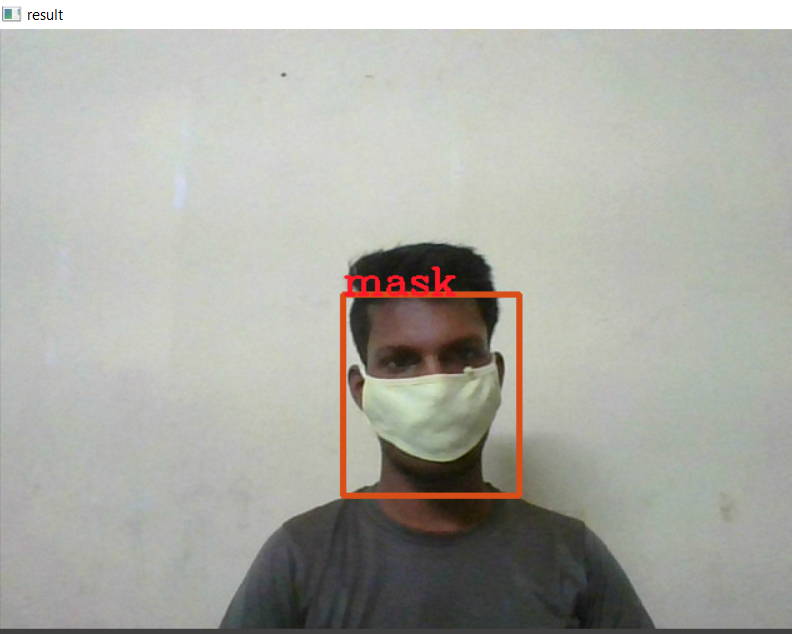

## summary

In this project, we have using machime learning model for face mask detection using Python, sklearn and OpenCV. We developed the face mask detector model for detecting whether person is wearing a mask or not. We have trained the model using sklearn . Training the model is the first part of this project and testing using webcam using OpenCV is the second part.

This is a nice project for beginners to implement their learnings and gain expertise.